# Color Threshold, Blue Screen

### Import Resources

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Read and Display the Image

In [4]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of the image data and its dimensions (height, width, and color)
print('This image is:', type(image), ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


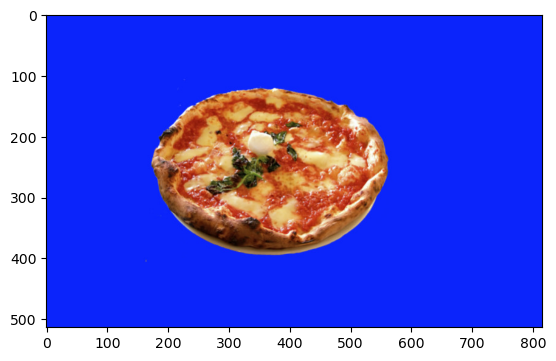

In [5]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

### Define the Color Threshold

In [39]:
# Isolate the blue background
lower_blue = np.array([0, 0, 200])
upper_blue = np.array([250, 250, 255])

### Create a Mask

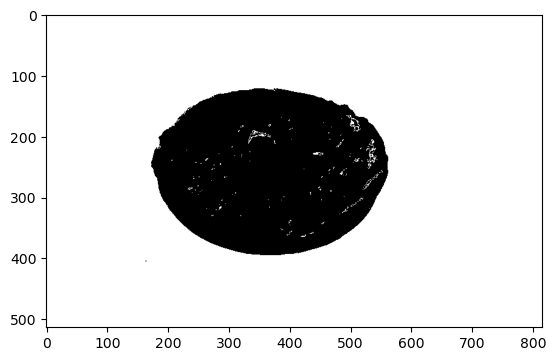

In [40]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Visualize the mask
plt.imshow(mask, cmap = 'gray')

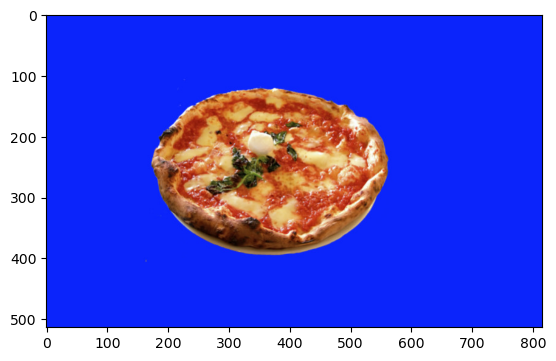

In [41]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)
masked_image[mask != 0] == [0, 0, 0]

# Display
plt.imshow(masked_image)

### Mask and Add a Background Image

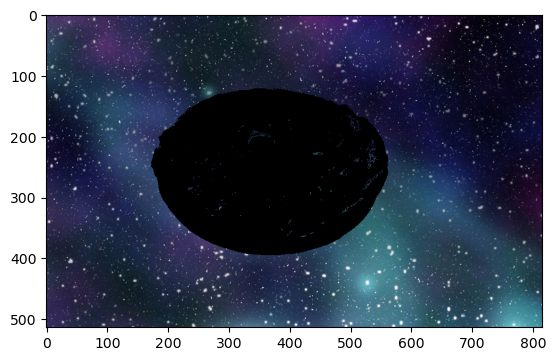

In [44]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop the image to the right size (514 x 816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### Create a Complete Image 

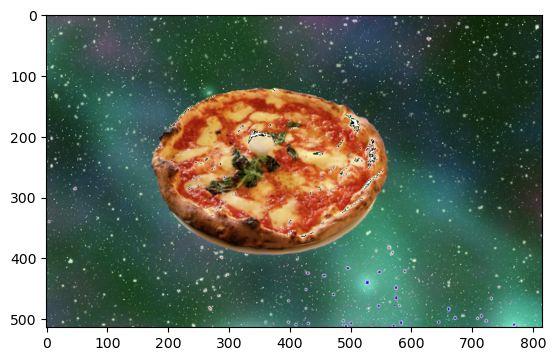

In [45]:
# Add the two images together to create a complete image
complete_image = masked_image + crop_background

# Display
plt.imshow(complete_image)